In [8]:
import argparse
import os
import cv2
import numpy as np
import torch
from torchvision import models
from pytorch_grad_cam import (
    GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus,
    AblationCAM, XGradCAM, EigenCAM, EigenGradCAM,
    LayerCAM, FullGrad, GradCAMElementWise
)
from pytorch_grad_cam import GuidedBackpropReLUModel
from pytorch_grad_cam.utils.image import (
    show_cam_on_image, deprocess_image, preprocess_image
)
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import matplotlib.pyplot as plt


In [9]:
model = models.resnet50(pretrained=True)


In [10]:
target_layers = [model.layer4]
image_path = "/home/antonino/Università/laurea/script test/xai/speedboat.jpg"
rgb_img = cv2.imread(image_path, 1)[:, :, ::-1]
rgb_img = np.float32(rgb_img) / 255
input_tensor = preprocess_image(rgb_img,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])

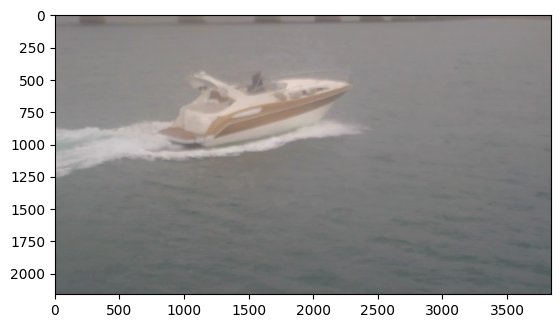

In [11]:
plt.imshow(rgb_img)

In [12]:
methods = {
    "gradcam": GradCAM,
    "hirescam": HiResCAM,
    "scorecam": ScoreCAM,
    "gradcam++": GradCAMPlusPlus,
    "ablationcam": AblationCAM,
    "xgradcam": XGradCAM,
    "eigencam": EigenCAM,
    "eigengradcam": EigenGradCAM,
    "layercam": LayerCAM,
    "fullgrad": FullGrad,
    "gradcamelementwise": GradCAMElementWise
}

In [13]:
targets = None
aug_smooth = False
eigen_smooth = False
i=0

In [14]:
method = "eigencam"
cam_algorithm = methods[method]
cam_algorithm

pytorch_grad_cam.eigen_cam.EigenCAM

In [15]:
method = "eigencam"

In [8]:
#for method in methods:
cam_algorithm = methods[method]
with cam_algorithm(model=model,
                    target_layers=target_layers,
                    use_cuda=False) as cam:


    # AblationCAM and ScoreCAM have batched implementations.
    # You can override the internal batch size for faster computation.
    cam.batch_size = 32
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets,
                        aug_smooth=aug_smooth,
                        eigen_smooth=eigen_smooth)

    grayscale_cam = grayscale_cam[0, :]
    i+=1
    print(i)


    cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
    cam_image = cv2.cvtColor(cam_image, cv2.COLOR_RGB2BGR)


gb_model = GuidedBackpropReLUModel(model=model, use_cuda=False)
gb = gb_model(input_tensor, target_category=None)

cam_mask = cv2.merge([grayscale_cam, grayscale_cam, grayscale_cam])
cam_gb = deprocess_image(cam_mask * gb)
gb = deprocess_image(gb)

plt.imshow(cam_image)
plt.imshow(gb)
plt.imshow(cam_gb)

# plt.imshow(cam_image)